<a href="https://colab.research.google.com/github/atikaakter/Atika/blob/master/MNIST_Work_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


In [9]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [10]:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100


In [11]:
model = Sequential([
 Dense(hidden_neurons, input_dim=input_size),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])

In [16]:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')

In [21]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.9607 - accuracy: 0.7604
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4891 - accuracy: 0.8827
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3920 - accuracy: 0.9014
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.3431 - accuracy: 0.9106
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3121 - accuracy: 0.9163
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2903 - accuracy: 0.9219
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2741 - accuracy: 0.9269
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2594 - accuracy: 0.9293
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2456 - accuracy: 0.9335
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2359 - accura

In [22]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Testaccuracy:', score[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9651
Testaccuracy: 0.9650999903678894


In [23]:
weights = model.layers[0].get_weights()

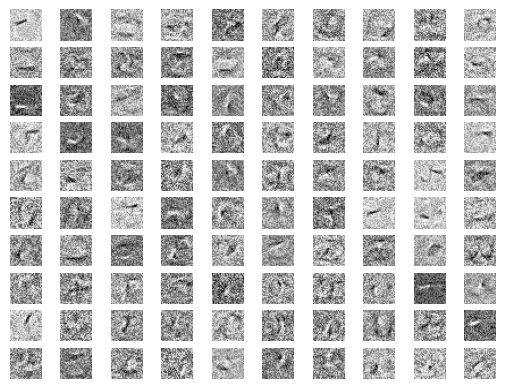

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy
fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.savefig("neuron_images.png", dpi=300)
plt.show()


In [28]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils


In [29]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)
input_size = 3072
batch_size = 100
epochs = 100


170498071/170498071 [==============================] - 3s 0us/step


In [30]:
model = Sequential([
 Dense(1024, input_dim=input_size),
 Activation('relu'),
 Dense(512),
 Activation('relu'),
 Dense(512),
 Activation('sigmoid'),
 Dense(classes),
 Activation('softmax')
])

In [31]:
model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
validation_data=(X_test, Y_test), verbose=1)


Epoch 1/100
500/500 [==============================] - 29s 55ms/step - loss: 2.1875 - accuracy: 0.1761 - val_loss: 2.1085 - val_accuracy: 0.1998
Epoch 2/100
500/500 [==============================] - 32s 64ms/step - loss: 2.0474 - accuracy: 0.2402 - val_loss: 1.9991 - val_accuracy: 0.2671
Epoch 3/100
500/500 [==============================] - 27s 53ms/step - loss: 1.9815 - accuracy: 0.2714 - val_loss: 1.9785 - val_accuracy: 0.2839
Epoch 4/100
500/500 [==============================] - 27s 53ms/step - loss: 1.9400 - accuracy: 0.2868 - val_loss: 1.9407 - val_accuracy: 0.2903
Epoch 5/100
500/500 [==============================] - 26s 52ms/step - loss: 1.9126 - accuracy: 0.3010 - val_loss: 1.8892 - val_accuracy: 0.3157
Epoch 6/100
500/500 [==============================] - 27s 54ms/step - loss: 1.8767 - accuracy: 0.3182 - val_loss: 1.8787 - val_accuracy: 0.3225
Epoch 7/100
500/500 [==============================] - 28s 55ms/step - loss: 1.8407 - accuracy: 0.3327 - val_loss: 1.8206 - val_ac

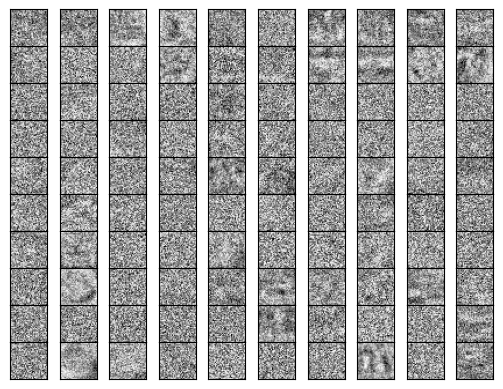

In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random
fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)
weights = model.layers[0].get_weights()
w = weights[0].T
for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
 ax = plt.Subplot(fig, outer_grid[i])
 ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2),
cmap=cm.Greys_r)
 ax.set_xticks([])
 ax.set_yticks([])
 fig.add_subplot(ax)
plt.show()